# 파이토치

<img src="https://github.com/pytorch/pytorch/raw/main/docs/source/_static/img/pytorch-logo-dark.png" width="600" style="background:white">

<!-- 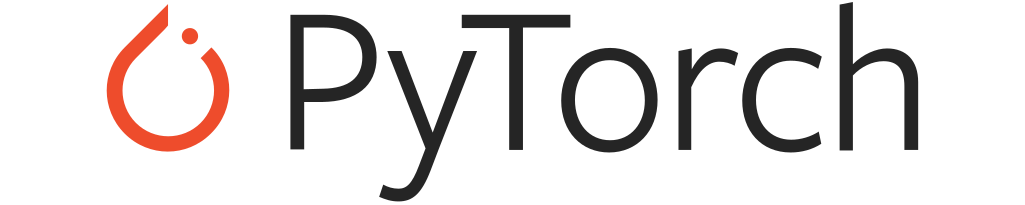 -->

## 파이토치 개념
- Meta AI(Facebook)에서 torch와 caffe2를 기반으로 2016년에 발표한 파이썬 기반 오픈소스 딥러닝 라이브러리
	- 구글에서 개발한 Tensorflow와 함께 가장 유명한 라이브러리 중 하나
	- 텐서플로의 사용자가 많았지만 비직관적인 구조와 난이도 때문에 증가추세
	- 현재는 텐서플로를 넘어섬

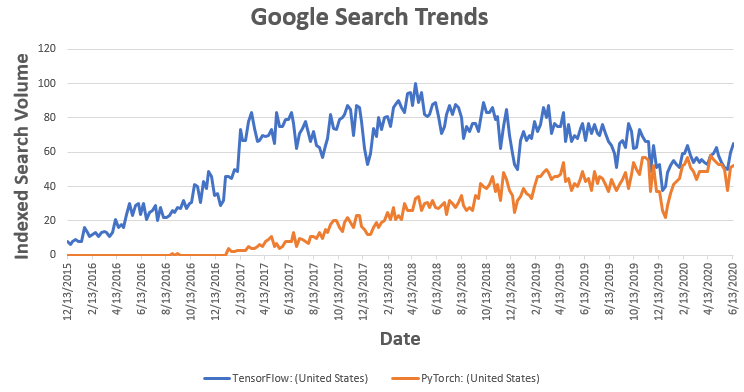

## 파이토치 설치

- https://pytorch.org/get-started/locally/ 에서 확인가능

### 설치방법 CPU / GPU

#### CPU 사용
- CPU 설치는 간단하지만, 그래픽카드 가속을 사용할 수 없다

```python
!pip install torch torchvision torchaudio
```

#### GPU 사용
- NVIDIA 계열만 가능함
- GPU를 사용할 수 있는지 확인한다

```shell
> nvidia-smi
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.86                 Driver Version: 551.86         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P8              5W /   40W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+------------------------+----------------------+
                                                                                         
+-----------------------------------------------------------------------------------------+
| Processes:                                                                              |
|  GPU   GI   CI        PID   Type   Process name                              GPU Memory |
|        ID   ID                                                               Usage      |
|=========================================================================================|
|  No running processes found                                                             |
+-----------------------------------------------------------------------------------------+
```

- 사용할 수 있는 CUDA 버전을 확인한 뒤, CUDA를 설치한다.
	- https://developer.nvidia.com/cuda-downloads 에서 버전에 맞는 CUDA 다운로드 설치


- CUDA 설치 후에는 PyTorch 사이트에서 확인, 설치한다


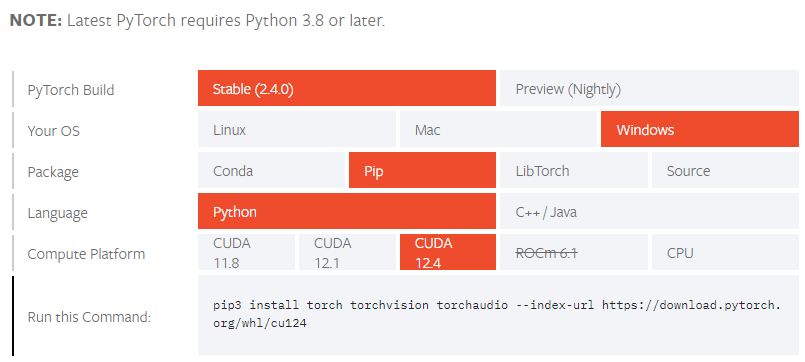 

```python
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124
```

## 파이토치 기초

### 텐서

- 파이토치에서 데이터를 저장하는 자료구조
- 넘파이와 성격, 사용법이 유사하다 -> np.array와 torch.tensor는 구조가 동일

####  원하는 형태(shape) 텐서 생성
- **torch.tensor(자료구조 \[, dtype\])**
    - 지정한 dtype(Data type)에 맞는 Tensor객체를 생성해서 반환한다

#### 특정 타입의 Tensor를 직접 생성
- torch.tensor()로 생성하면서 dtype을 지정하면 아래 타입의 Tensor객체가 생성된다
- 원하는 Type의 Tensor클래스를 이용해 직접 생성해도 된다.
- **torch.FloatTensor(자료구조)**
    - float32 타입 텐서 생성
- **torch.LongTensor(자료구조)** 
    - int64 타입 텐서생성
- 그외
    - BoolTensor(bool), CharTensor(int8), ShortTensor(int16), IntTensor(int32), DoubleTensor(float64)
    
#### tensor 상태 조회
- **tensor.shape, tensor.size(\[축번호\])**
    -  tensor의 shape조회
- **tensor.dtype, tensor.type()**
    - tensor 원소들의 데이터타입 조회
    - dtype은 **data type**을 type()은 tensor **객체의 클래스 타입**을 반환한다
- **tensor.ndim, tensor.dim()**  : tensor 차원
- **tensor.numel()**: 전체 원소 개수

### 실습시작

In [24]:
## 파이토치 로드
import torch
import numpy as np

In [3]:
## 버전확인
torch.__version__

'2.3.1+cu121'

#### 텐서 만들기

In [4]:
## 2행 4열 텐서 만들기
tensor1 = torch.tensor([[1,2,3,4], [5,6,7,8]], dtype=torch.float64)

In [15]:
## 텐서의 모양과 크기
print(tensor1.shape, tensor1.size())

torch.Size([2, 4]) torch.Size([2, 4])


In [8]:
## 행별 크기
print(tensor1.shape[0], tensor1.size(0))

2 2


In [14]:
## 열별 크기
print(tensor1[0].shape, tensor1[0].size())

torch.Size([4]) torch.Size([4])


In [11]:
## 타입확인
print(tensor1.type(), tensor1.dtype)

torch.DoubleTensor torch.float64


In [17]:
## 차원크기
print(tensor1.dim(), tensor1.ndim)

2 2


In [19]:
## 원소의 개수
tensor1.numel()

8

In [20]:
## 디바이스
tensor1.device

device(type='cpu')

In [21]:
## GPU로 
tensor2 = tensor1.to('cuda')

In [22]:
tensor2.device

device(type='cuda', index=0)

In [23]:
## np.array와 구조가 유사
torch.tensor(range(10))

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [25]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
## float32
print(torch.FloatTensor([1, 3, 5, 7, 9]))
print(torch.FloatTensor([1, 3, 5, 7, 9]).dtype)
## float64
print(torch.DoubleTensor([1, 3, 5, 7, 9]).dtype)
## int32
print(torch.IntTensor([1, 3, 5, 7, 9]).dtype)
## int
print(torch.LongTensor([1, 3, 5, 7, 9]).dtype)

tensor([1., 3., 5., 7., 9.])
torch.float32
torch.float64
torch.int32
torch.int64


#### 특정값으로 구성된 텐서 만들기

In [36]:
## Zeros
torch.zeros(2, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [34]:
## 3차원
torch.zeros(3, 3, 3)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]])

In [35]:
## Ones
torch.ones(2, 4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [39]:
## full
torch.full((2, 4), fill_value=10)

tensor([[10, 10, 10, 10],
        [10, 10, 10, 10]])

In [40]:
tensor1

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], dtype=torch.float64)

In [42]:
## tensor1과 같은 사이즈의 0으로만 초기화된 tensor 생성
torch.zeros_like(tensor1)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=torch.float64)

In [43]:
## Ones_like
torch.ones_like(tensor1)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

In [44]:
## Full_liks
torch.full_like(tensor1, 10)

tensor([[10., 10., 10., 10.],
        [10., 10., 10., 10.]], dtype=torch.float64)

In [73]:
## 2행 4열을 의미없는 값으로 채움
torch.empty(2, 4)

tensor([[7.5797e-01, 1.2892e-42, 5.0000e+00, 7.0000e+00],
        [9.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

#### 동일한 간격으로 떨어진 값으로 구성된 배열 만들기

In [45]:
## 0부터 9까지 1씩
torch.arange(10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [46]:
## 0부터 9까지 2씩
torch.arange(0, 10, 2)

tensor([0, 2, 4, 6, 8])

In [47]:
torch.arange(0, 5, 0.1)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000, 1.1000, 1.2000, 1.3000, 1.4000, 1.5000, 1.6000, 1.7000,
        1.8000, 1.9000, 2.0000, 2.1000, 2.2000, 2.3000, 2.4000, 2.5000, 2.6000,
        2.7000, 2.8000, 2.9000, 3.0000, 3.1000, 3.2000, 3.3000, 3.4000, 3.5000,
        3.6000, 3.7000, 3.8000, 3.9000, 4.0000, 4.1000, 4.2000, 4.3000, 4.4000,
        4.5000, 4.6000, 4.7000, 4.8000, 4.9000])

In [49]:
## 0부터 10까지 등분한 값 5개
torch.linspace(0, 10, 5)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [50]:
torch.linspace(0, 1, 11)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [75]:
## Seed 생성, 실험을 동일하게 진행하기 위해서 동일한 난수의 사용이 필요
torch.manual_seed(1004)

In [82]:
## 2행4열 실수 난수 생성
torch.rand(2, 4)

tensor([[0.2158, 0.2537, 0.4651, 0.7905],
        [0.3953, 0.1476, 0.2021, 0.0531]])

In [84]:
## 2행4열을 정규분포 난수로 생성
torch.randn(2, 4)

tensor([[-0.4566, -0.3821,  1.3289, -0.8143],
        [ 0.1265,  0.1331,  0.3048,  0.4993]])

In [86]:
## 2행4열 1~10사이 정수로 난수 생성
torch.randint(1, 10, (2, 4))

tensor([[1, 1, 8, 2],
        [1, 8, 4, 1]])

In [106]:
## 0~4 사이의 5개 수의 순서를 랜덤하게 생성
torch.randperm(5)

tensor([2, 3, 4, 1, 0])

#### 텐서를 상수로

In [109]:
## 텐서값 변수
a = torch.tensor(10)
print(a, a.dtype, a.type())

tensor(10) torch.int64 torch.LongTensor


In [111]:
## 텐서의 상수화
a.item()

10

In [116]:
## 2행4열 텐서
ea = torch.ones(2, 4)
ea.shape

torch.Size([2, 4])

In [120]:
## 하나의 값을 상수로 만드는 것은 가능
ea[0][0].item()

1.0

In [122]:
## 여러값은 불가능하다
ea.item()

RuntimeError: a Tensor with 8 elements cannot be converted to Scalar

#### ndarray 호환

#### 텐서를 CPU/GPU에 사용

#### 인덱싱과 슬라이싱

#### Reshape

#### 더미사용

### 실습계속 - 텐서 연산 및 주요함수

### element-wise 연산

#### 주요연산함수

#### 기술통계함수

### 실습계속 - 자동미분

#### 자동미분

#### 미분미사용

#### 그라디엔트 초기화